In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("../app/data/reviews_data.csv")

The aim of this notebook is to evaluate whether the downloaded data is useful for the project's purpose. It includes simple data analysis, such as checking for duplicates, calculating mean values, and assessing the diversity of the dataset.

### EDA

In [23]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [24]:
df = df.rename(columns={"Unnamed: 0":"Comment_id"})

In [25]:
df.columns

Index(['Comment_id', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [26]:
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'Comment_id'])

There were few duplicated rows, so they were removed from dataset

In [27]:
len(df)

23465

In [28]:
for column in [ 'Age', 'Rating','Positive Feedback Count']:
    print("--------------")
    print(column)
    print(df[column].describe())

--------------
Age
count    23465.000000
mean        43.200128
std         12.280712
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64
--------------
Rating
count    23465.000000
mean         4.195355
std          1.110278
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64
--------------
Positive Feedback Count
count    23465.000000
mean         2.538206
std          5.704248
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64


General ststistics for age, ratings and feedback look okay, the values are diverse and seem to be reflecting typical user behavior

In [29]:
df['Recommended IND'].value_counts(normalize=True)

Recommended IND
1    0.822203
0    0.177797
Name: proportion, dtype: float64

In [30]:
df['Clothing ID'].unique().shape

(1206,)

What types of products have the largest assortment?

In [31]:
df.groupby('Class Name')['Clothing ID'].nunique()

Class Name
Blouses            41
Casual bottoms      2
Chemises            1
Dresses            64
Fine gauge         34
Intimates         108
Jackets            33
Jeans              25
Knits              46
Layering           50
Legwear            50
Lounge            220
Outerwear          26
Pants              50
Shorts             86
Skirts             35
Sleep              92
Sweaters           38
Swim              161
Trend              38
Name: Clothing ID, dtype: int64

What type of product has the highest number of reviews?

In [32]:
df.groupby('Class Name')['Clothing ID'].count()

Class Name
Blouses           3093
Casual bottoms       2
Chemises             1
Dresses           6312
Fine gauge        1099
Intimates          154
Jackets            704
Jeans             1146
Knits             4835
Layering           146
Legwear            165
Lounge             691
Outerwear          328
Pants             1388
Shorts             317
Skirts             945
Sleep              228
Sweaters          1428
Swim               350
Trend              119
Name: Clothing ID, dtype: int64

In [33]:
df_products = df.groupby('Class Name')['Clothing ID'].agg(n_products='nunique', n_reviews='count').reset_index()

In [34]:
df_products

,Class Name,n_products,n_reviews
0,Blouses,41,3093
1,Casual bottoms,2,2
2,Chemises,1,1
3,Dresses,64,6312
4,Fine gauge,34,1099
5,Intimates,108,154
6,Jackets,33,704
7,Jeans,25,1146
8,Knits,46,4835
9,Layering,50,146


The plot shows that not all product categories are reviewed (or purchased) with the same frequency. The most commented products are dresses, knitwear, and blouses, but categories like loungewear and swimwear have fewer reviews while having a high number of offered items. This observation could be influenced by one or a few particularly popular items, for example: one bestselling dress. But the reason behind that os not crucial for the current analysis.

For now it seems like the data from this dataset is diverse. Product categories are represented by varying numbers of items and reviews, which reflects a possible scenario in e-commerce.

The dataset seems useful for the purposes of the project.

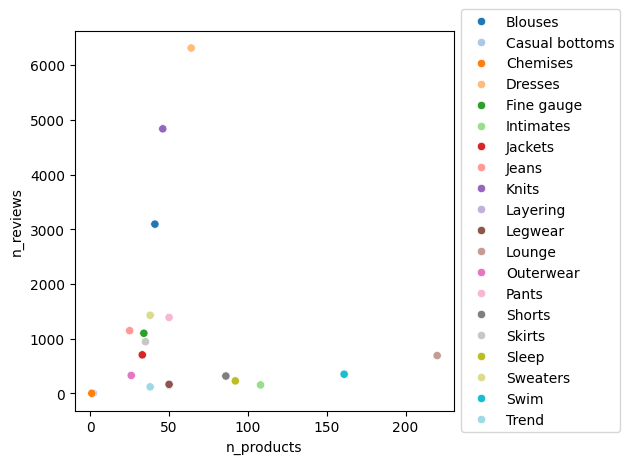

In [35]:
sns.set_palette("tab20")
ax = sns.scatterplot(data = df_products, x="n_products", y="n_reviews", hue="Class Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Feature engineering

In [36]:
df["Product_name"] = df["Class Name"] + "_" + df["Clothing ID"].astype(str)

In [37]:
df.head()

,Comment_id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Product_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Intimates_767
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Dresses_1080
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Dresses_1077
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Pants_1049
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Blouses_847


In [ ]:
df.to_csv("../app/data/reviews_data_cleaned.csv")